In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as ny # linear algebra
import pandas as ps # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Things Not To Do While Weight Initialization**

**1. Not Initialize Zero**

In [2]:
column1 = ny.random.uniform(low = -1, high = 2, size=(50,))
column2 = ny.random.uniform(low = -1, high = 1.5, size=(50,))
output = ny.array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,], dtype = int)
arrays = ny.column_stack((column1, column2, output))
dataset = ps.DataFrame(arrays, columns = ['column1', 'column2', 'output'])
dataset.head(10)

,column1,column2,output
0,1.486411,-0.454131,0.0
1,-0.309539,0.016466,1.0
2,-0.219263,0.088854,1.0
3,0.987196,-0.402302,0.0
4,-0.645402,0.899190,0.0
5,-0.214261,-0.341479,0.0
6,-0.740038,-0.061651,1.0
7,0.982327,-0.649126,0.0
8,-0.413478,0.629528,1.0
9,1.092916,-0.029053,1.0


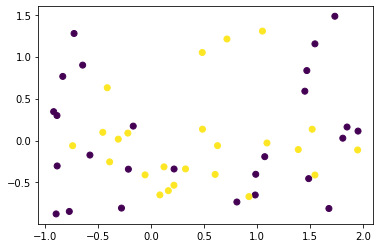

In [3]:
plt.scatter(dataset['column1'], dataset['column2'], c = dataset['output'])

In [4]:
x = dataset.iloc[:, 0:2].values
y = dataset.iloc[:, -1].values

In [5]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [6]:
model = Sequential()

model.add(Dense(2, activation = 'relu', input_dim = 2))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


2022-12-28 00:28:07.522402: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
model.get_weights()

[array([[ 1.0422117 , -0.73127043],
        [-0.72261924, -0.8551008 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.26996338],
        [1.1538714 ]], dtype=float32),
 array([0.], dtype=float32)]

In [8]:
initial_weights = model.get_weights()
initial_weights[0] = ny.zeros(model.get_weights()[0].shape)
initial_weights[1] = ny.zeros(model.get_weights()[1].shape)
initial_weights[2] = ny.zeros(model.get_weights()[2].shape)
initial_weights[3] = ny.zeros(model.get_weights()[3].shape)
model.set_weights(initial_weights)
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [9]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
traininglog1 = model.fit(x, y, epochs = 100, validation_split = 0.2)

2022-12-28 00:28:07.819824: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
2/2 [==============================] - 1s 215ms/step - loss: 0.6931 - accuracy: 0.5250 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 34ms/step - loss: 0.6931 - accuracy: 0.5250 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 34ms/step - loss: 0.6931 - accuracy: 0.5250 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 35ms/step - loss: 0.6931 - accuracy: 0.5250 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 34ms/step - loss: 0.6930 - accuracy: 0.5250 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 0s 35ms/step - loss: 0.6930 - accuracy: 0.5250 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 0s 33ms/step - loss: 0.6930 - accuracy: 0.5250 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/100
2/2 [==

In [10]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([-0.02837973], dtype=float32)]

/opt/conda/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot:>

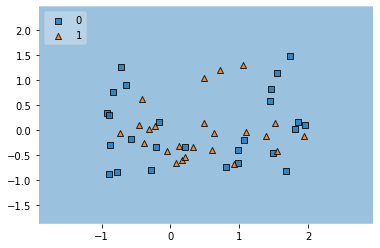

In [11]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x, y.astype('int'), clf = model, legend = 2)

In [12]:
model = Sequential()

model.add(Dense(2, activation = 'tanh', input_dim = 2))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.get_weights()

[array([[ 0.0088439 , -0.70717996],
        [ 0.33088815,  0.9103788 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.7031282],
        [-0.9847189]], dtype=float32),
 array([0.], dtype=float32)]

In [14]:
initial_weights = model.get_weights()
initial_weights[0] = ny.zeros(model.get_weights()[0].shape)
initial_weights[1] = ny.zeros(model.get_weights()[1].shape)
initial_weights[2] = ny.zeros(model.get_weights()[2].shape)
initial_weights[3] = ny.zeros(model.get_weights()[3].shape)
model.set_weights(initial_weights)
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [15]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
traininglog1 = model.fit(x, y, epochs = 100, validation_split = 0.2)

Epoch 1/100
2/2 [==============================] - 1s 178ms/step - loss: 0.6931 - accuracy: 0.5250 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 33ms/step - loss: 0.6931 - accuracy: 0.5250 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 33ms/step - loss: 0.6931 - accuracy: 0.5250 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 34ms/step - loss: 0.6931 - accuracy: 0.5250 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 33ms/step - loss: 0.6930 - accuracy: 0.5250 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 0s 34ms/step - loss: 0.6930 - accuracy: 0.5250 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 0s 33ms/step - loss: 0.6930 - accuracy: 0.5250 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/100
2/2 [==

In [16]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([-0.05025262], dtype=float32)]

<AxesSubplot:>

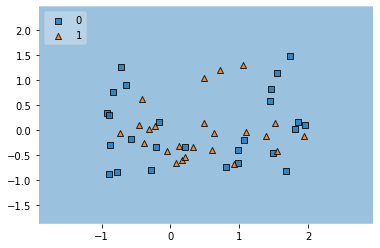

In [17]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x, y.astype('int'), clf = model, legend = 2)

In [18]:
model = Sequential()

model.add(Dense(10, activation = 'sigmoid', input_dim = 2))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.get_weights()

[array([[ 0.4460693 ,  0.670589  , -0.56204695, -0.49932534,  0.18154788,
         -0.5099445 , -0.12110019,  0.15862352,  0.59599084, -0.46899784],
        [-0.52055234,  0.00905484, -0.3118887 , -0.03241533,  0.6632884 ,
         -0.419291  , -0.23334163,  0.23168057, -0.69303054,  0.35307187]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.15104377],
        [-0.49298918],
        [ 0.03051126],
        [-0.14854145],
        [-0.17895657],
        [-0.29505056],
        [-0.66197395],
        [-0.49100894],
        [-0.22367412],
        [-0.6188102 ]], dtype=float32),
 array([0.], dtype=float32)]

In [20]:
initial_weights = model.get_weights()
initial_weights[0] = ny.zeros(model.get_weights()[0].shape)
initial_weights[1] = ny.zeros(model.get_weights()[1].shape)
initial_weights[2] = ny.zeros(model.get_weights()[2].shape)
initial_weights[3] = ny.zeros(model.get_weights()[3].shape)
model.set_weights(initial_weights)
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [21]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
traininglog1 = model.fit(x, y, epochs = 100, validation_split = 0.2)

Epoch 1/100
2/2 [==============================] - 1s 182ms/step - loss: 0.6931 - accuracy: 0.5250 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 33ms/step - loss: 0.6930 - accuracy: 0.5250 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 32ms/step - loss: 0.6928 - accuracy: 0.5250 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 32ms/step - loss: 0.6929 - accuracy: 0.5250 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 32ms/step - loss: 0.6926 - accuracy: 0.5250 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 0s 34ms/step - loss: 0.6926 - accuracy: 0.5250 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 0s 33ms/step - loss: 0.6925 - accuracy: 0.5250 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 8/100
2/2 [==

In [22]:
model.get_weights()

[array([[0.1077936 , 0.1077936 , 0.1077936 , 0.1077936 , 0.1077936 ,
         0.1077936 , 0.1077936 , 0.1077936 , 0.10779361, 0.10779361],
        [0.04453957, 0.04453957, 0.04453957, 0.04453957, 0.04453957,
         0.04453957, 0.04453957, 0.04453957, 0.04453957, 0.04453957]],
       dtype=float32),
 array([0.00763701, 0.00763701, 0.00763701, 0.00763701, 0.00763701,
        0.00763701, 0.00763701, 0.00763701, 0.007637  , 0.007637  ],
       dtype=float32),
 array([[-0.0158832 ],
        [-0.0158832 ],
        [-0.0158832 ],
        [-0.0158832 ],
        [-0.0158832 ],
        [-0.0158832 ],
        [-0.0158832 ],
        [-0.0158832 ],
        [-0.01588321],
        [-0.01588321]], dtype=float32),
 array([-0.01296634], dtype=float32)]

<AxesSubplot:>

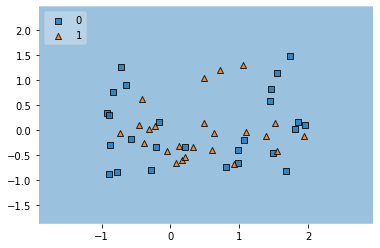

In [23]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x, y.astype('int'), clf = model, legend = 2)

**2. Non-Zero Constant**

In [24]:
model = Sequential()

model.add(Dense(2, activation = 'relu', input_dim = 2))
# model.add(Dense(2, activation = 'tanh', input_dim = 2))
# model.add(Dense(2, activation = 'sigmoid', input_dim = 2))

model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.get_weights()

[array([[-0.93061745, -0.82708704],
        [-0.8818336 ,  0.9239062 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.46732962],
        [ 1.1429125 ]], dtype=float32),
 array([0.], dtype=float32)]

In [26]:
initial_weights = model.get_weights()
initial_weights[0] = ny.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = ny.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = ny.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = ny.ones(model.get_weights()[3].shape)*0.5
model.set_weights(initial_weights)
model.get_weights()

[array([[0.5, 0.5],
        [0.5, 0.5]], dtype=float32),
 array([0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [27]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
traininglog1 = model.fit(x, y, epochs = 100, validation_split = 0.2)

Epoch 1/100
2/2 [==============================] - 1s 179ms/step - loss: 0.9787 - accuracy: 0.4750 - val_loss: 0.7749 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 32ms/step - loss: 0.9760 - accuracy: 0.4750 - val_loss: 0.7735 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 34ms/step - loss: 0.9733 - accuracy: 0.4750 - val_loss: 0.7723 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 35ms/step - loss: 0.9705 - accuracy: 0.4750 - val_loss: 0.7711 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 32ms/step - loss: 0.9680 - accuracy: 0.4750 - val_loss: 0.7700 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 0s 33ms/step - loss: 0.9652 - accuracy: 0.4750 - val_loss: 0.7688 - val_accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 0s 33ms/step - loss: 0.9628 - accuracy: 0.4750 - val_loss: 0.7676 - val_accuracy: 0.5000
Epoch 8/100
2/2 [==

In [28]:
model.get_weights()

[array([[0.34710267, 0.34710267],
        [0.3602616 , 0.3602616 ]], dtype=float32),
 array([0.35232314, 0.35232314], dtype=float32),
 array([[0.34187725],
        [0.34187725]], dtype=float32),
 array([0.32905218], dtype=float32)]

<AxesSubplot:>

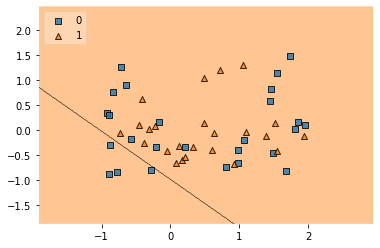

In [29]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x, y.astype('int'), clf = model, legend = 2)

**3. Ramdon Initializatin With too small or too large weights**

In [30]:
model = Sequential()

model.add(Dense(10, activation = 'tanh', input_dim = 2))
model.add(Dense(10, activation = 'tanh'))
model.add(Dense(10, activation = 'tanh'))
model.add(Dense(10, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_9 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 11        
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.get_weights()

[array([[-0.36694428, -0.4501548 ,  0.03726894,  0.39713997, -0.6066029 ,
          0.5919871 , -0.26549783,  0.21833801, -0.16220891,  0.6210013 ],
        [-0.06272173, -0.05985004, -0.6281544 ,  0.10708386,  0.21354812,
          0.58085746,  0.35978895, -0.57406855,  0.01876849,  0.1700784 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.40311378,  0.12706923,  0.30300784, -0.43759406, -0.52271277,
          0.15145248, -0.347156  , -0.46489593, -0.19268134, -0.40684637],
        [-0.5312346 , -0.10369763,  0.16362661, -0.20521641,  0.15772587,
          0.34165215, -0.02851331,  0.41226965,  0.04513681,  0.44341052],
        [-0.07996929,  0.13298166, -0.3178381 ,  0.4217558 , -0.4052583 ,
         -0.32088053, -0.227729  , -0.42226034, -0.3253786 ,  0.03237885],
        [ 0.37619936, -0.3699953 , -0.54674315,  0.5068822 ,  0.16204321,
         -0.5023699 , -0.5344745 , -0.04420167, -0.4668682 ,  0.03367233],
        [-0.00498

In [32]:
initial_weights = model.get_weights()

initial_weights[0] = ny.random.randn(model.get_weights()[0].shape[0],model.get_weights()[0].shape[1])*0.01
initial_weights[1] = ny.zeros(model.get_weights()[1].shape)
initial_weights[2] = ny.random.randn(model.get_weights()[2].shape[0],model.get_weights()[2].shape[1])*0.01
initial_weights[3] = ny.ones(model.get_weights()[3].shape)
initial_weights[4] = ny.random.randn(model.get_weights()[4].shape[0],model.get_weights()[4].shape[1])*0.01
initial_weights[5] = ny.zeros(model.get_weights()[5].shape)
initial_weights[6] = ny.random.randn(model.get_weights()[6].shape[0],model.get_weights()[6].shape[1])*0.01
initial_weights[7] = ny.zeros(model.get_weights()[7].shape)
initial_weights[8] = ny.random.randn(model.get_weights()[8].shape[0],model.get_weights()[8].shape[1])*0.01
initial_weights[9] = ny.zeros(model.get_weights()[9].shape)

model.set_weights(initial_weights)
model.get_weights()

[array([[-0.00121303,  0.01337704, -0.02065001, -0.00536479,  0.00471921,
          0.01298627, -0.00440768, -0.00558725, -0.00689767,  0.01037993],
        [-0.0104843 , -0.01934279,  0.00235735,  0.00379853, -0.00084956,
         -0.02256716,  0.00548506,  0.00926758, -0.00364909,  0.02331895]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 9.29112360e-03,  2.07530707e-02,  4.79447050e-03,
          1.31779155e-02,  5.18538058e-03,  2.50602304e-03,
         -8.89889523e-03,  5.92381135e-03, -3.35483113e-03,
          1.22298962e-02],
        [ 7.38790957e-03, -2.99062533e-03, -5.39474981e-03,
          5.63691789e-03, -1.70340016e-02, -1.06257740e-02,
          5.33907441e-03,  1.30304620e-02,  1.63569592e-03,
         -1.83415413e-02],
        [ 1.07863676e-02, -6.45310711e-03,  7.85387401e-03,
         -2.31638690e-03, -7.28545291e-03, -1.05535006e-02,
          9.47559904e-03, -7.66856974e-05,  2.92127463e-03,
          7.2508147

In [33]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
traininglog1 = model.fit(x, y, epochs = 100, validation_split = 0.2)

Epoch 1/100
2/2 [==============================] - 1s 206ms/step - loss: 0.6932 - accuracy: 0.4750 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 33ms/step - loss: 0.6931 - accuracy: 0.5250 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 33ms/step - loss: 0.6931 - accuracy: 0.5250 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 33ms/step - loss: 0.6931 - accuracy: 0.5250 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 33ms/step - loss: 0.6931 - accuracy: 0.5250 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 0s 33ms/step - loss: 0.6931 - accuracy: 0.5250 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 0s 35ms/step - loss: 0.6931 - accuracy: 0.5250 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/100
2/2 [==

In [34]:
model.get_weights()

[array([[ 0.1337223 ,  0.12458734, -0.14484015, -0.1380032 ,  0.13387248,
          0.14487144, -0.11702523, -0.13032746, -0.14097075,  0.10690309],
        [ 0.04423016,  0.02939401, -0.04702452, -0.04930325,  0.05092881,
          0.031086  , -0.04117497, -0.04197631, -0.05674075,  0.06312791]],
       dtype=float32),
 array([-0.00066073, -0.00382244,  0.00229409,  0.00122808, -0.00198083,
        -0.00135015,  0.00294525,  0.00226017,  0.00154584, -0.00596011],
       dtype=float32),
 array([[ 0.10609122,  0.11761507,  0.10145652,  0.10938498,  0.1018372 ,
          0.09896961,  0.08768947,  0.10031828,  0.09395147,  0.1062477 ],
        [ 0.09911516,  0.08886122,  0.08620004,  0.09663187,  0.07458805,
          0.08042777,  0.09664181,  0.10214383,  0.09387596,  0.0699497 ],
        [-0.09863294, -0.11616206, -0.10145096, -0.11089053, -0.1166504 ,
         -0.1189262 , -0.0993159 , -0.10669699, -0.10698237, -0.09788779],
        [-0.11072866, -0.10702249, -0.10884579, -0.09545304, 

<AxesSubplot:>

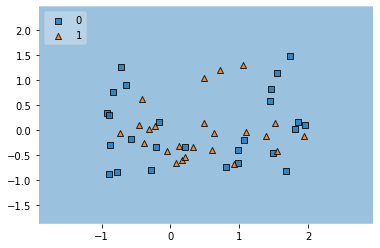

In [35]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x, y.astype('int'), clf = model, legend = 2)

**Technique Use To Weights Initializatioin**

**1.  Xavier/Gloarat**

In [36]:
model = Sequential()

model.add(Dense(10, activation = 'tanh', input_dim = 2))
model.add(Dense(10, activation = 'tanh'))
model.add(Dense(10, activation = 'tanh'))
model.add(Dense(10, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 11        
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.get_weights()

[array([[-4.57764149e-01,  4.72534120e-01, -6.22378290e-01,
         -3.22101057e-01,  6.07547462e-01, -5.37996411e-01,
          6.32690609e-01, -1.32858753e-04, -5.64666748e-01,
          1.95837677e-01],
        [ 4.77227271e-01,  4.61070955e-01, -4.82731462e-02,
          4.04224575e-01, -2.82437801e-02,  1.03989065e-01,
          6.98424041e-01, -1.23079419e-01,  4.26037312e-02,
          9.93943214e-03]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.324493  , -0.4479136 ,  0.50629246,  0.11240035,  0.5057645 ,
         -0.21160957, -0.37836882, -0.34812444,  0.18390721,  0.10789889],
        [-0.22792631,  0.18446416, -0.23554829,  0.40998006,  0.5009496 ,
         -0.15697408,  0.19684368, -0.18603903, -0.21141708, -0.00458765],
        [ 0.32621473, -0.34839982,  0.5420662 ,  0.38903624, -0.4044236 ,
         -0.48256844, -0.14001408, -0.18014744, -0.43090641, -0.41731307],
        [-0.24693552, -0.3423825 ,  0.4321556 ,  0.332904

In [38]:
initial_weights = model.get_weights()

initial_weights[0] = ny.random.randn(2, 10)*ny.sqrt(1/2)
initial_weights[1] = ny.zeros(model.get_weights()[1].shape)
initial_weights[2] = ny.random.randn(10, 10)*ny.sqrt(1/10)
initial_weights[3] = ny.ones(model.get_weights()[3].shape)
initial_weights[4] = ny.random.randn(10, 10)*ny.sqrt(1/10)
initial_weights[5] = ny.zeros(model.get_weights()[5].shape)
initial_weights[6] = ny.random.randn(10, 10)*ny.sqrt(1/10)
initial_weights[7] = ny.zeros(model.get_weights()[7].shape)
initial_weights[8] = ny.random.randn(10, 1)*ny.sqrt(1/10)
initial_weights[9] = ny.zeros(model.get_weights()[9].shape)

model.set_weights(initial_weights)
model.get_weights()

[array([[ 0.07320308, -2.1461604 , -0.5088108 ,  0.5155365 , -0.6333085 ,
          0.33386198, -0.25334743, -1.150657  , -0.4582386 ,  1.3169577 ],
        [ 0.36264342,  1.2417754 , -0.24146278, -0.51626587, -0.2950222 ,
          0.18550001, -1.4264243 , -0.5815501 , -0.9205529 ,  0.31800354]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.0914037 ,  0.48573542, -0.5282383 ,  0.13765417, -0.21563017,
          0.34307936, -0.24370785,  0.01914181, -0.23254855,  0.07383347],
        [-0.20847319,  0.19677402, -0.01557027, -0.09134658,  0.24404338,
          0.01404626,  0.5680751 , -0.12345506, -0.0151866 ,  0.00317213],
        [-0.35974196,  0.21591528, -0.16333193, -0.44436625,  0.24734668,
         -0.35969013, -0.2567249 , -0.56661206, -0.19969076,  0.40671676],
        [ 0.05319477, -0.5510852 , -0.15076509, -0.27653497,  0.05151141,
          0.24750817, -0.1585202 ,  0.17358255,  0.4416623 ,  0.17981407],
        [-0.20342

In [39]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
traininglog1 = model.fit(x, y, epochs = 100, validation_split = 0.2)

Epoch 1/100
2/2 [==============================] - 1s 203ms/step - loss: 0.7297 - accuracy: 0.4750 - val_loss: 0.7046 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 34ms/step - loss: 0.7235 - accuracy: 0.4750 - val_loss: 0.7017 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 36ms/step - loss: 0.7178 - accuracy: 0.4750 - val_loss: 0.6993 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 34ms/step - loss: 0.7120 - accuracy: 0.4750 - val_loss: 0.6969 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 36ms/step - loss: 0.7086 - accuracy: 0.4750 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 0s 34ms/step - loss: 0.7047 - accuracy: 0.4750 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 0s 35ms/step - loss: 0.7014 - accuracy: 0.4750 - val_loss: 0.6914 - val_accuracy: 0.5000
Epoch 8/100
2/2 [==

In [40]:
model.get_weights()

[array([[ 0.12014544, -1.9473726 , -0.64404696,  0.42203984, -0.7224297 ,
          0.48428777, -0.23498249, -1.2768917 , -0.5216416 ,  1.4248527 ],
        [ 0.3415376 ,  1.371198  , -0.21025714, -0.5932459 , -0.22524363,
          0.20282824, -1.4811145 , -0.45776838, -0.86659294,  0.27369463]],
       dtype=float32),
 array([-0.03948615,  0.15203358, -0.00031282,  0.01837653,  0.09311361,
         0.02707863, -0.09733971, -0.1273867 ,  0.12233577,  0.11655751],
       dtype=float32),
 array([[-0.01934709,  0.5663396 , -0.43932128,  0.22512937, -0.2736023 ,
          0.33591875, -0.19948898, -0.05003692, -0.11880035,  0.16078022],
        [-0.31825787,  0.24350879, -0.1364522 , -0.2072359 ,  0.3410879 ,
          0.0538302 ,  0.50150377, -0.0216451 ,  0.05031558, -0.03241954],
        [-0.51383656,  0.16802566, -0.3034956 , -0.5718855 ,  0.35793504,
         -0.37372988, -0.2694897 , -0.45872986, -0.20952003,  0.3367241 ],
        [ 0.15467972, -0.5502389 , -0.04947589, -0.20542854, 

<AxesSubplot:>

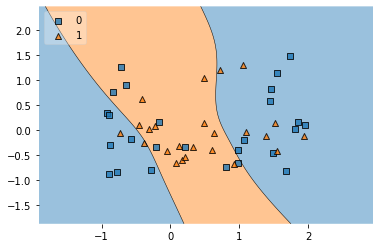

In [41]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x, y.astype('int'), clf = model, legend = 2)

**2. He Normal**

In [42]:
model = Sequential()
# kernel_initializer = 'glorat_normal', 'he_uniform'
model.add(Dense(10, activation = 'relu', input_dim = 2, kernel_initializer = 'he_normal'))
model.add(Dense(10, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(10, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(10, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_19 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_20 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_21 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 11        
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.get_weights()

[array([[-1.3127266 , -1.8597947 , -0.56630594, -0.19462755, -1.8108797 ,
         -0.6250412 ,  1.4159745 ,  0.78057283, -0.86212534,  0.46745792],
        [-1.3334063 , -1.416209  , -0.7168257 , -0.9831203 , -0.6450357 ,
          1.0250388 , -0.32000583,  1.2322847 , -0.17608248,  0.1274573 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.26848498,  0.74987835,  0.31119978, -0.32826272, -0.21869302,
         -0.20222874, -0.2601529 ,  0.58245623,  0.59618306,  0.6764391 ],
        [-0.729133  ,  0.43892902, -0.87235755,  0.8906823 ,  0.05417204,
          0.52290565, -0.6481032 ,  0.0586175 , -0.12961367, -0.010395  ],
        [ 0.32611287, -0.9871827 , -0.2781259 , -0.48518452,  0.86810625,
          0.16245975, -0.26715714, -0.32362586,  0.5424028 , -0.47689787],
        [ 0.4222551 , -0.4680913 , -0.03558909, -0.2150221 , -0.15715106,
          0.09936615,  0.59265846,  0.16242225, -0.7143444 ,  0.1098821 ],
        [ 0.01973

In [44]:
# initial_weights = model.get_weights()

# initial_weights[0] = ny.random.randn(2, 10)*ny.sqrt(1/2)
# initial_weights[1] = ny.zeros(model.get_weights()[1].shape)
# initial_weights[2] = ny.random.randn(10, 10)*ny.sqrt(1/10)
# initial_weights[3] = ny.ones(model.get_weights()[3].shape)
# initial_weights[4] = ny.random.randn(10, 10)*ny.sqrt(1/10)
# initial_weights[5] = ny.zeros(model.get_weights()[5].shape)
# initial_weights[6] = ny.random.randn(10, 10)*ny.sqrt(1/10)
# initial_weights[7] = ny.zeros(model.get_weights()[7].shape)
# initial_weights[8] = ny.random.randn(10, 1)*ny.sqrt(1/10)
# initial_weights[9] = ny.zeros(model.get_weights()[9].shape)

# model.set_weights(initial_weights)
# model.get_weights()

In [45]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
traininglog1 = model.fit(x, y, epochs = 100, validation_split = 0.2)

Epoch 1/100
2/2 [==============================] - 1s 209ms/step - loss: 0.6535 - accuracy: 0.5250 - val_loss: 0.6678 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 36ms/step - loss: 0.6514 - accuracy: 0.5250 - val_loss: 0.6669 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 35ms/step - loss: 0.6500 - accuracy: 0.5250 - val_loss: 0.6660 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 35ms/step - loss: 0.6485 - accuracy: 0.5250 - val_loss: 0.6650 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 34ms/step - loss: 0.6470 - accuracy: 0.5250 - val_loss: 0.6643 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 0s 35ms/step - loss: 0.6457 - accuracy: 0.5250 - val_loss: 0.6636 - val_accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 0s 37ms/step - loss: 0.6446 - accuracy: 0.5250 - val_loss: 0.6626 - val_accuracy: 0.5000
Epoch 8/100
2/2 [==

In [46]:
model.get_weights()

[array([[-1.3469373 , -1.8113102 , -0.59644073, -0.27104756, -1.7677616 ,
         -0.700614  ,  1.5176433 ,  0.83019364, -0.89928883,  0.44711477],
        [-1.3563887 , -1.4780824 , -0.61674166, -0.8931829 , -0.724241  ,
          1.0719889 , -0.33057678,  1.2528135 , -0.12695694,  0.1954125 ]],
       dtype=float32),
 array([ 0.10436427, -0.12489284,  0.03521589,  0.07274787, -0.02928255,
        -0.05680858, -0.04568834, -0.05413353, -0.07869387, -0.05817026],
       dtype=float32),
 array([[ 0.26657107,  0.78224206,  0.4132729 , -0.33807737, -0.2514758 ,
         -0.26249373, -0.2601529 ,  0.5330558 ,  0.5151679 ,  0.767243  ],
        [-0.71811426,  0.46587804, -0.7869177 ,  0.8881653 ,  0.04159817,
          0.48489293, -0.6481032 ,  0.02783513, -0.19332841,  0.06272493],
        [ 0.32361063, -0.94923425, -0.17537117, -0.4897412 ,  0.831487  ,
          0.1111217 , -0.26715714, -0.37410396,  0.46744922, -0.38848346],
        [ 0.40204218, -0.39402077,  0.09228341, -0.18187915, 

<AxesSubplot:>

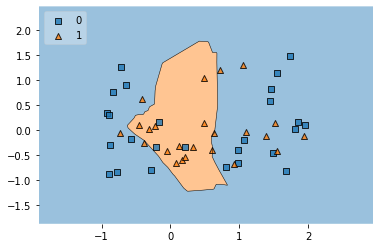

In [47]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x, y.astype('int'), clf = model, legend = 2)